# Exercise 7

1. Implement simulated annealing for the travelling salesman. As proposal, permute two random stations on the route. As cooling scheme, you can use e.g. $Tk = 1/ √1 + k$ or
$Tk = − log(k + 1)$, feel free to experiment with different choices. The route must end where it started. Initialise with a random permutation of stations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) Have input be positions in the plane of the n stations. Let the cost of going i → j be the Euclidian distance between station i and j. Plot the resulting route in the plane.
Debug with stations on a circle.

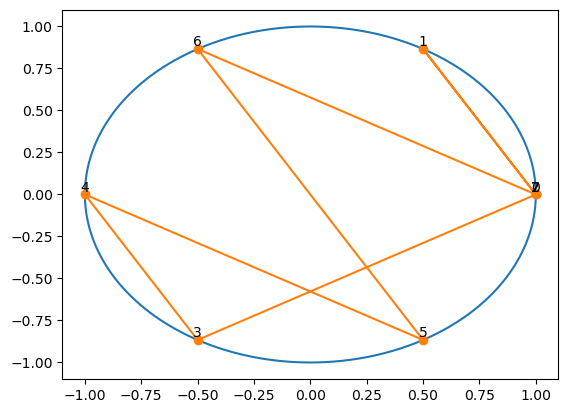

In [9]:
def generate_circle_points(n, radius=1):
    theta = np.linspace(0, 2*np.pi, n)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y

def compute_euclidean_distance(i, j):
    return np.sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2)

def total_cost(x):
    res = 0
    for i in range(len(x)-1):
        res += compute_euclidean_distance(x[i],x[i+1])
    res += compute_euclidean_distance(x[-1], x[0])
    return  res

x, y = generate_circle_points(1000)
n = 7
stations_x, stations_y = generate_circle_points(n)
stations = np.column_stack((stations_x, stations_y))
route = stations.copy()
np.random.shuffle(route)
route = np.vstack((route, route[0]))

plt.figure()
plt.plot(x, y)
plt.plot(route[:, 0], route[:, 1], '-o')
for i, station in enumerate(route):
    plt.text(station[0], station[1], str(i), ha='center', va='bottom')
plt.show()

Optimized Route:
[[-5.00000000e-01 -8.66025404e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-5.00000000e-01  8.66025404e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -2.44929360e-16]
 [ 5.00000000e-01 -8.66025404e-01]
 [-5.00000000e-01 -8.66025404e-01]]
Total Cost: 6.0


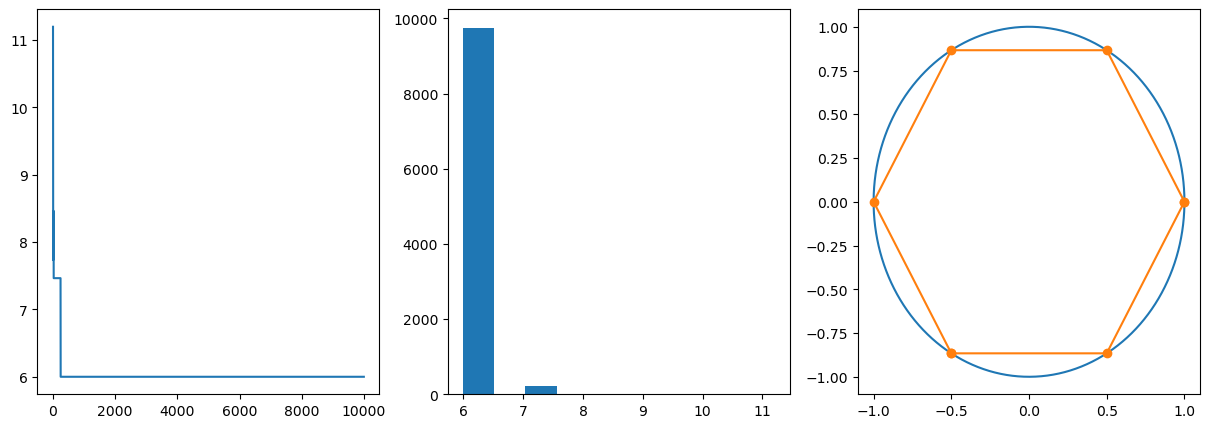

In [56]:

stations_x, stations_y = generate_circle_points(n)
stations = np.column_stack((stations_x, stations_y))
route_x = stations.copy()
np.random.shuffle(route_x)
cost_x = total_cost(route_x)
cost_list = []
T = 1
k = 10000
for i in range(k):
    route_y = route_x.copy()
    np.random.shuffle(route_y)
    #route_y = np.vstack((route_y, route_y[0]))
    cost_y = total_cost(route_y)
    ap = min(1,np.exp((-cost_y + cost_x)/T))
    if np.random.uniform() <= ap:
        route_x = route_y
        cost_x = cost_y
    cost_list.append(cost_x)
    if i>10:
        T = 1/np.sqrt(1+i)
        #T = -np.log(i+1)

route_x = np.vstack((route_x, route_x[0]))
print("Optimized Route:")
print(route_x)
print("Total Cost:", cost_x)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(cost_list)
axs[1].hist(cost_list)
axs[2].plot(x, y)
axs[2].plot(route_x[:, 0], route_x[:, 1], '-o')


(b) Then modify your progamme to work with costs directly and apply it to the cost matrix from the course homepage.

C:\Users\dsous\AppData\Local\Temp\ipykernel_96344\1099005750.py:45: RuntimeWarning: overflow encountered in exp
  ap = min(1,np.exp((-cost_y + cost_x)/T))


Optimized Route:
[10 18 14  9 15  8  1  8  4  0  3  6  5 11 12 16 17 10  2  7 13  8  3 19
 19 10]
Total Cost: 1901


(array([5640.,    0.,    0.,    0., 3944.,  341.,    0.,    0.,    0.,
          75.]),
 array([1901. , 1963.7, 2026.4, 2089.1, 2151.8, 2214.5, 2277.2, 2339.9,
        2402.6, 2465.3, 2528. ]),
 <BarContainer object of 10 artists>)

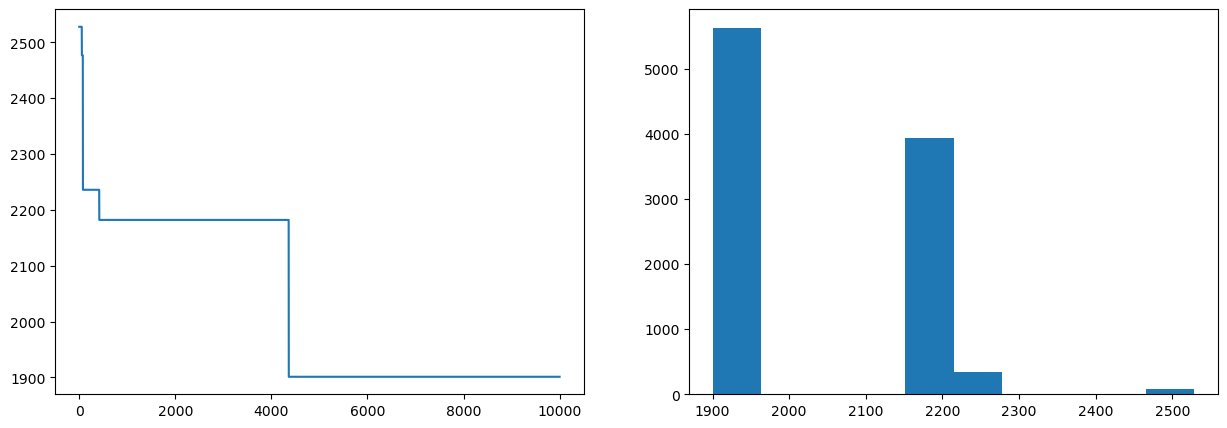

In [69]:
data = [0, 225, 110, 8, 257, 22, 83, 231, 277, 243, 94, 30, 4, 265, 274, 250, 87, 83, 271, 86,
        255, 0, 265, 248, 103, 280, 236, 91, 3, 87, 274, 265, 236, 8, 24, 95, 247, 259, 28, 259,
        87, 236, 0, 95, 248, 110, 25, 274, 250, 271, 9, 244, 83, 250, 248, 280, 29, 26, 239, 7,
        8, 280, 83, 0, 236, 28, 91, 239, 280, 259, 103, 23, 6, 280, 244, 259, 95, 87, 230, 84,
        268, 87, 239, 271, 0, 244, 275, 9, 84, 25, 244, 239, 275, 83, 110, 24, 274, 280, 84, 274,
        21, 265, 99, 29, 259, 0, 99, 230, 265, 271, 87, 5, 22, 239, 236, 250, 87, 95, 271, 91,
        95, 236, 28, 91, 247, 93, 0, 247, 259, 244, 27, 91, 87, 268, 275, 280, 7, 8, 240, 27,
        280, 83, 250, 261, 4, 239, 230, 0, 103, 24, 239, 261, 271, 95, 87, 21, 274, 255, 110, 280,
        247, 9, 280, 274, 84, 255, 259, 99, 0, 87, 255, 274, 280, 3, 27, 83, 259, 244, 28, 274,
        230, 103, 268, 275, 23, 244, 264, 28, 83, 0, 268, 275, 261, 91, 95, 8, 277, 261, 84, 247,
        87, 239, 9, 103, 261, 110, 29, 255, 239, 261, 0, 259, 84, 239, 261, 242, 24, 25, 242, 5,
        30, 255, 95, 30, 247, 4, 87, 274, 242, 255, 99, 0, 24, 280, 274, 259, 91, 83, 247, 91,
        8, 261, 83, 6, 255, 29, 103, 261, 247, 242, 110, 29, 0, 261, 244, 230, 87, 84, 280, 100,
        242, 8, 259, 280, 99, 242, 244, 99, 3, 84, 280, 236, 259, 0, 27, 95, 274, 261, 24, 268,
        274, 22, 250, 236, 83, 261, 247, 103, 22, 91, 250, 236, 261, 25, 0, 103, 255, 261, 5, 247,
        244, 91, 261, 255, 28, 236, 261, 29, 103, 9, 242, 261, 244, 87, 110, 0, 242, 236, 95, 259,
        84, 236, 27, 99, 230, 83, 7, 259, 230, 230, 22, 87, 93, 250, 255, 247, 0, 9, 259, 24,
        91, 242, 28, 87, 250, 110, 6, 271, 271, 255, 27, 103, 84, 250, 271, 244, 5, 0, 271, 29,
        261, 24, 250, 271, 84, 255, 261, 87, 28, 110, 250, 248, 248, 22, 3, 103, 271, 248, 0, 236,
        103, 271, 8, 91, 255, 91, 21, 271, 236, 271, 7, 250, 83, 247, 250, 271, 22, 27, 248, 0]

dist_matrix = np.reshape(data, (20, 20))

def total_cost2(dist_matrix, x):
    res = 0
    for i in range(len(x)-1):
        res += dist_matrix[x[i],x[i+1]]
    res += dist_matrix[x[-1],x[0]]
    return res

n = len(dist_matrix)
stations = np.arange(n)
route_x = stations.copy()
np.random.shuffle(route_x)
route_x = np.concatenate((route_x, [route_x[0]]))
cost_x = total_cost2(dist_matrix, route_x)
cost_list = []
T = 1
k = 10000
for i in range(k):
    route_y = route_x.copy()
    np.random.shuffle(route_y)
    route_y = np.concatenate((route_y, [route_y[0]]))
    cost_y = total_cost2(dist_matrix, route_y)
    ap = min(1,np.exp((-cost_y + cost_x)/T))
    if np.random.uniform() <= ap:
        route_x = route_y
        cost_x = cost_y
    cost_list.append(cost_x)
    if i>10:
        T = 1/np.sqrt(1+i)
        #T = -np.log(i+1)

print("Optimized Route:")
print(route_x)
print("Total Cost:", cost_x)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(cost_list)
axs[1].hist(cost_list)